In [1]:
#importing packages I'll need
import numpy as np                   #for numerical operations and analysis
import matplotlib.pyplot as plt      #for plotting
import pandas as pd                  #for data frame analysis

<h1>Analysis of the Correlation Between River Discharge and Turbidity Levels in the Columbia River in 2018, 2019, 2022, and 2023</h1>

**Liam Boettcher**

<p>OCEAN 215 Final Project<br>
Autumn 2024</p>

<h2>Introduction</h2>

This research and analysis was performed in order to gain a better understanding of the ways in which turbidity is related to or affected by river discharge levels in the lower Columbia River between Washington and Oregon states. Turbidity is a measure of water clarity, used as a proxy to estimate the amount of sediment is suspended within the water, with high turbidity indicating lower clarity of water or higher amound of dissolved sediment and low turbidity indicating higher clarity of water or less dissolved sediment. River discharge describes the volume of water flowing through a given section of the river. Understanding the effects of river discharge on turbidity can help us better understand how storms may impact water quality, with the Columbia River serving as a source of drinking water for roughly 5 million people in Washington, Oregon, Montana, and Idaho.

It is hypothesized that river discharge and turbidity will have a positive correlation, meaning that when river discharge increases so will turbidity. When river discharge increases, so does river velocity, meaning that water can more easily pick up and transport sediments on the bottom of the river. Additionally, increased river discharge means higher water level, allowing the river to pick up sediment higher up the river bank that is otherwise not affected by river flow. This stream bank erosion will increse turbidity in the river. This research aims to determine whether this correlation exists by performing statistical analysis between river discharge and turbidity levels at a USGS river measurement station in Vancouver, Washington in the years 2018, 2019, and parts of 2022 and 2023.

<h2>Data Sources:</h2>

- River Discharge Data
    - Downloaded from USGS on 2024-11-22.
    - Data collected by surface mounted flow meter (multiplied by river dimensions to get flow volume).
    - Relevant variables:
        - Date (YYYY-MM-DD format)
        - Time (hh:mm format)
        - Discharge amount (in cubic feet per second)
    - USGS station WA-14144700 at Vancouver, Washington (approx. 45.6207, -122.673).
    - Data doesn't download directly as file, opens as text in new tab. Text copied into excel file, exported as tab separated .txt file to be used for analysis.
    - Data collected hourly, 2016-03-03 - present
    - URL: https://waterdata.usgs.gov/monitoring-location/14144700/#dataTypeId=continuous-72137-0&period=P7D&showMedian=false
- Turbidity Data
    - Downloaded from USGS on 2024-11-22
    - Data collected by surface mounted nephelometer
    - Relevant variables:
        - Date (YYYY-MM-DD format)
        - Time (hh:mm format)
        - Turbidity (FNU)
    - USGS station WA-14144700 at Vancouver, Washington (approx. 45.6207, -122.673).
    - Data doesn't download directly as file, opens as text in new tab. Text copied into excel file, exported as tab separated .txt file to be used for analysis.
    - Data collected quarter-hourly, 2016-04-16 - present
    - URL: https://waterdata.usgs.gov/monitoring-location/14144700/#dataTypeId=continuous-63680-264921905&period=P7D&showMedian=false

<h2>1. Plotting of river discharge data from 2018-01-01 to 2018-12-31</h2>

This section includes the importing, formatting, and plotting of river discharge data from January 1st to December 31st, 2018. This graph will aid initial visual interpretation of long term river discharge patterns in this timeframe.

,agency_cd,site_no,datetime,tz_cd,227828_72137,227828_72137_cd,Unnamed: 6,new_datetime
0,USGS,14144700,1/1/2018,0:00,PST,195000,A,2018-01-01 00:00:00
1,USGS,14144700,1/1/2018,1:00,PST,194000,A,2018-01-01 01:00:00
2,USGS,14144700,1/1/2018,2:00,PST,194000,A,2018-01-01 02:00:00
3,USGS,14144700,1/1/2018,3:00,PST,193000,A,2018-01-01 03:00:00
4,USGS,14144700,1/1/2018,4:00,PST,192000,A,2018-01-01 04:00:00
...,...,...,...,...,...,...,...,...
8755,USGS,14144700,12/31/2018,19:00,PST,132000,A,2018-12-31 19:00:00
8756,USGS,14144700,12/31/2018,20:00,PST,132000,A,2018-12-31 20:00:00
8757,USGS,14144700,12/31/2018,21:00,PST,132000,A,2018-12-31 21:00:00
8758,USGS,14144700,12/31/2018,22:00,PST,132000,A,2018-12-31 22:00:00


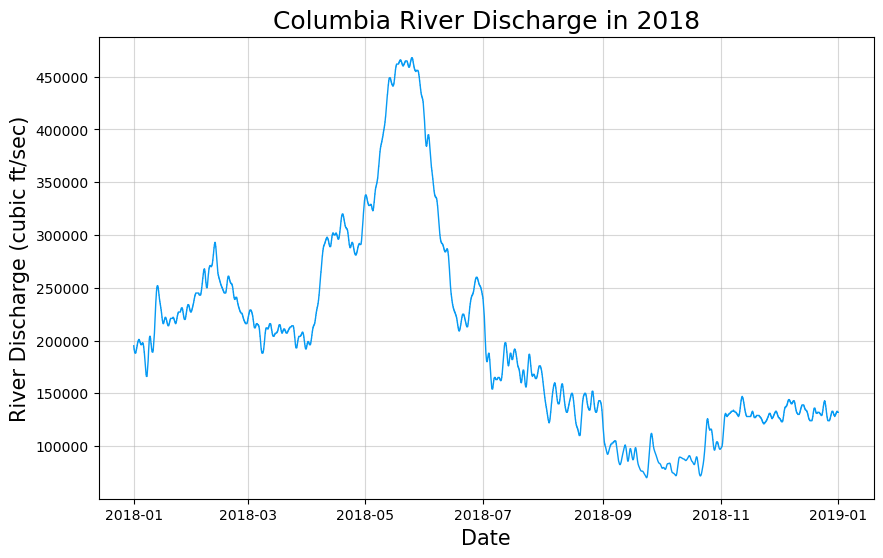

In [2]:
#2018 RIVER DISCHARGE DATA
header_dis_2018 = 27
discharge_2018_df = pd.read_csv("2018_discharge.txt", sep = "\t", header = 0, skiprows = header_dis_2018) #converting to pandas dataframe so I can make datetime objects
discharge_2018_df["new_datetime"] = discharge_2018_df["datetime"].astype(str) + " " + discharge_2018_df["tz_cd"].astype(str) #adding datetime column
discharge_2018_df["new_datetime"] = pd.to_datetime(discharge_2018_df["new_datetime"]) #formatting to be datetime
datetime_dis_2018 = discharge_2018_df["new_datetime"].values #making datetime 1D array for plotting
discharge_2018 = discharge_2018_df["227828_72137_cd"].values #making discharge 1D array for plotting
display(discharge_2018_df)

fig, ax = plt.subplots(figsize = (10,6)) #inserting blank plot
ax.plot(datetime_dis_2018, discharge_2018, color = "#069AF3", linewidth = 1) #plotting river discharge levels over time
ax.set_title("Columbia River Discharge in 2018", fontsize = 18) #adding title
ax.set_xlabel("Date", fontsize = 15) #adding x-axis label
ax.set_ylabel("River Discharge (cubic ft/sec)", fontsize = 15) #adding y-axis label
ax.grid(alpha = 0.5) #adding gridlines
plt.rcParams.update({"font.size":13}) #increasing the fontsize to make the graph more easily readable

**Figure 1:** River discharge level of the Columbia River in 2018. This plot shows peaks in river discharge around 2018-6 and 2018-2, and a trough around 2018-10, which will be compared to turbidity values to see if similar peaks and/or troughs occur and if there is a relationship.

<h2>2. Plotting of turbidity data from 2018-01-01 to 2018-12-31</h2>

This section includes the importing, formatting, and plotting of turbidity data from January 1st to December 31st, 2018. This graph will aid initial visual interpretation of long term turbidity patterns in this timeframe.

,agency_cd,site_no,datetime,tz_cd,116835_63680,116835_63680_cd,Unnamed: 6,new_datetime
0,USGS,14144700,1/1/2018,0:00,PST,12.8,A,2018-01-01 00:00:00
1,USGS,14144700,1/1/2018,0:05,PST,12.8,A,2018-01-01 00:05:00
2,USGS,14144700,1/1/2018,0:10,PST,12.7,A,2018-01-01 00:10:00
3,USGS,14144700,1/1/2018,0:15,PST,13.1,A,2018-01-01 00:15:00
4,USGS,14144700,1/1/2018,0:20,PST,12.7,A,2018-01-01 00:20:00
...,...,...,...,...,...,...,...,...
106222,USGS,14144700,12/31/2018,23:35,PST,4.1,A,2018-12-31 23:35:00
106223,USGS,14144700,12/31/2018,23:40,PST,4.0,A,2018-12-31 23:40:00
106224,USGS,14144700,12/31/2018,23:45,PST,4.1,A,2018-12-31 23:45:00
106225,USGS,14144700,12/31/2018,23:50,PST,4.0,A,2018-12-31 23:50:00


,116835_63680_cd
new_datetime,
2018-01-01 00:00:00,12.8
2018-01-01 00:05:00,12.8
2018-01-01 00:10:00,12.7
2018-01-01 00:15:00,13.1
2018-01-01 00:20:00,12.7
...,...
2018-12-31 23:35:00,4.1
2018-12-31 23:40:00,4.0
2018-12-31 23:45:00,4.1


,116835_63680_cd
new_datetime,
2018-01-01 00:00:00,12.875000
2018-01-01 01:00:00,12.625000
2018-01-01 02:00:00,12.716667
2018-01-01 03:00:00,12.183333
2018-01-01 04:00:00,11.508333
...,...
2018-12-31 19:00:00,4.216667
2018-12-31 20:00:00,4.266667
2018-12-31 21:00:00,4.291667


/tmp/ipykernel_99/209881437.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  turb_new_2018["turb_trend"] = turb_new_2018["116835_63680_cd"].rolling(window = 400, min_periods = 1).mean() #making trendline for turbidity


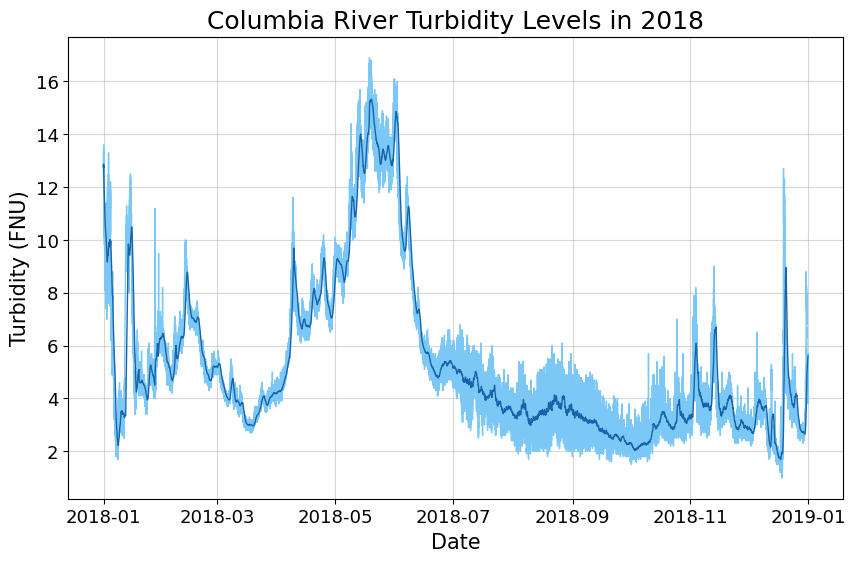

In [3]:
#2018 TURBIDITY DATA
header_turb_2018 = 26
turbidity_2018_df = pd.read_csv("2018_turbidity.txt", sep = "\t", header = 0, skiprows = header_turb_2018) #converting to pandas dataframe so I can make datetime objects
turbidity_2018_df["new_datetime"] = turbidity_2018_df["datetime"].astype(str) + " " + turbidity_2018_df["tz_cd"].astype(str) #adding datetime column
turbidity_2018_df["new_datetime"] = pd.to_datetime(turbidity_2018_df["new_datetime"]) #formatting to be datetime
datetime_turb_2018 = turbidity_2018_df["new_datetime"].values #making datetime 1D array for plotting
turbidity_2018 = turbidity_2018_df["116835_63680_cd"].values #making discharge 1D array for plotting
display(turbidity_2018_df)

#resampling data to be hourly so it matches the other dataset
turb_new_2018 = turbidity_2018_df[["new_datetime", "116835_63680_cd"]] #making a new data frame with only datetime and turbidity
turb_new_2018.set_index("new_datetime", inplace = True) #setting datetime to be the index
display(turb_new_2018)
turb_hourly_2018 = turb_new_2018.resample("H").mean()
display(turb_hourly_2018)

#plotting
fig, ax = plt.subplots(figsize = (10,6)) #inserting blank plot
ax.plot(turb_new_2018.index, turb_new_2018["116835_63680_cd"], color = "#7BC8F6", linewidth = 1) #plotting salinity over time
turb_new_2018["turb_trend"] = turb_new_2018["116835_63680_cd"].rolling(window = 400, min_periods = 1).mean() #making trendline for turbidity
ax.plot(turb_new_2018.index, turb_new_2018["turb_trend"], color = "#1864AB", linewidth = 1, label = "Turbidity Moving Average")
ax.grid(alpha = 0.5) #adding gridlines
plt.rcParams.update({"font.size":12}) #increasing the fontsize to make the graph more easily readable
ax.set_title("Columbia River Turbidity Levels in 2018", fontsize = 18) #setting title
ax.set_xlabel("Date", fontsize = 15) #setting x-axis label
ax.set_ylabel("Turbidity (FNU)", fontsize = 15) #setting y-axis label
plt.rcParams.update({"font.size":12}) #increasing the fontsize to make the graph more easily readable

**Figure 2:** Turbidity levels in the Columbia River in 2018, including a moving average line (darker blue). This plot shows peaks in turbidity around 2018-6 and 2018-2, which will be compared to river discharge values to see if similar peaks and/or troughs occur and if there is a relationship.

<h2>3. Regression between river discharge and turbidity data from 2018-01-01 to 2018-12-31</h2>

This section includes the interpolating of turbidity data to ensure there are an equal number of data points in both the turbidity and river discharge data sets, as well as regression analysis between the two variables to check for correlation and plotting of the regression. This will quantify the relationship between river discharge and turbidity under this timeframe.

In [4]:
#checking if there are NaN values I need to interpolate
print(turb_hourly_2018["116835_63680_cd"].isna().sum()) #seeing if there are any NaN values
print(discharge_2018_df["227828_72137_cd"].isna().sum()) #seeing if there are any NaN values

24
0


In [5]:
#finding the indices where I need to interpolate
nan_indices_2018 = np.where(turb_hourly_2018.isna()) #finding NaN indices
print(nan_indices_2018) #printing them so I can see where they are

(array([ 241,  242,  243,  244,  245,  246,  247,  248,  249,  250,  251,
        263,  264,  265,  266,  267,  268,  269,  270,  271,  272,  273,
        274, 1658]), array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0]))


In [6]:
#interpolating over gaps
turb_hourly_2018["116835_63680_cd"] = turb_hourly_2018["116835_63680_cd"].interpolate(method = "linear") #interpolating
print(turb_hourly_2018["116835_63680_cd"].isna().sum()) #seeing if there are any NaN values

0


There is an 80.91915733665955 % correlation


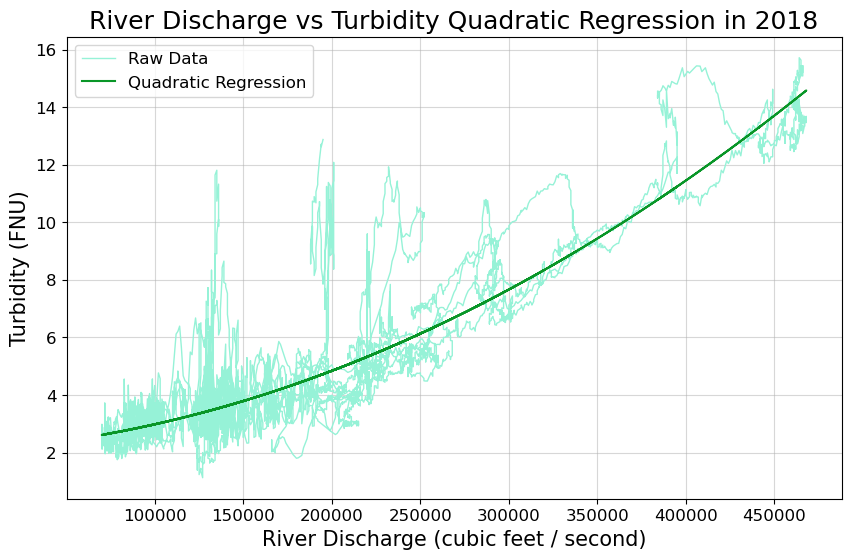

In [7]:
#using np.polyfit to get quadratic regression, plotting graph with quadratic regression line
coefficients_2018 = np.polyfit(discharge_2018_df["227828_72137_cd"], turb_hourly_2018["116835_63680_cd"], 2) #fitting quadratic regression
a_2018, b_2018, c_2018 = coefficients_2018 #extracting coefficients for equation
quad_reg_2018 = a_2018*discharge_2018_df["227828_72137_cd"]**2 + b_2018*discharge_2018_df["227828_72137_cd"] + c_2018 #formatting quadratic regression equation
fig, ax = plt.subplots(figsize=(10,6)) #inserting blank plot
ax.plot(discharge_2018_df["227828_72137_cd"], turb_hourly_2018["116835_63680_cd"], color="#96F2D7", linewidth=1, label="Raw Data") #plotting raw data
ax.plot(discharge_2018_df["227828_72137_cd"], quad_reg_2018, label="Quadratic Regression", color="#099628") #plotting quadratic regression line
ax.legend(fontsize=12) # adding legend
ax.set_title("River Discharge vs Turbidity Quadratic Regression in 2018", fontsize=18) #setting title
ax.set_xlabel("River Discharge (cubic feet / second)", fontsize=15) #seeting x-axis label
ax.set_ylabel("Turbidity (FNU)", fontsize=15) #setting y-axis label
plt.rcParams.update({"font.size":14}) #adjusting font size
ax.grid(alpha = 0.5)

#performing a quadratic regression!
coefficients_2018 = np.polyfit(turb_hourly_2018["116835_63680_cd"], discharge_2018_df["227828_72137_cd"], 2) #finding a, b, and c coefficients for quadratic regression
quadratic_fit_2018 = np.poly1d(coefficients_2018) #creating quadratic function
predicted_values_2018 = quadratic_fit_2018(turb_hourly_2018["116835_63680_cd"]) #find predicted values based on quadratic function

#calculate r-squared for the quadratic regression
ss_total_2018 = np.sum((discharge_2018_df["227828_72137_cd"] - np.mean(discharge_2018_df["227828_72137_cd"])) ** 2) #sum of squares (measures total variance in data)
ss_residual_2018 = np.sum((discharge_2018_df["227828_72137_cd"] - predicted_values_2018) ** 2) #residual sum of squares, measures variance between observed and predicted values
r_squared_2018 = 1 - (ss_residual_2018 / ss_total_2018) #calculating r-squared from those values
print("There is an", r_squared_2018*100, "% correlation")

**Figure 3:** Regression between turbidity and river discharge levels in the Columbia River in 2018, with a quadratic line of best fit (darker green). R-squared correlation value is 0.8092, showing that there is a significant correlation between river discharge and turbidity in this timeframe. Notice the distribution of data points, with the majority being on the lower end. Also notice the large number of outliers in this dataset, influencing the r-squared value.

<h2>4. Plotting of river discharge data from 2019-01-01 to 2019-12-31</h2>

This section includes the importing, formatting, and plotting of river discharge data from January 1st to December 31st, 2019. This graph will aid initial visual interpretation of long term river discharge patterns in this timeframe.

,agency_cd,site_no,datetime,tz_cd,227828_72137,227828_72137_cd,Unnamed: 6,new_datetime
0,USGS,14144700,1/1/2019,0:00,PST,132000,A,2019-01-01 00:00:00
1,USGS,14144700,1/1/2019,1:00,PST,132000,A,2019-01-01 01:00:00
2,USGS,14144700,1/1/2019,2:00,PST,132000,A,2019-01-01 02:00:00
3,USGS,14144700,1/1/2019,3:00,PST,132000,A,2019-01-01 03:00:00
4,USGS,14144700,1/1/2019,4:00,PST,132000,A,2019-01-01 04:00:00
...,...,...,...,...,...,...,...,...
8755,USGS,14144700,12/31/2019,19:00,PST,122000,A,2019-12-31 19:00:00
8756,USGS,14144700,12/31/2019,20:00,PST,122000,A,2019-12-31 20:00:00
8757,USGS,14144700,12/31/2019,21:00,PST,122000,A,2019-12-31 21:00:00
8758,USGS,14144700,12/31/2019,22:00,PST,122000,A,2019-12-31 22:00:00


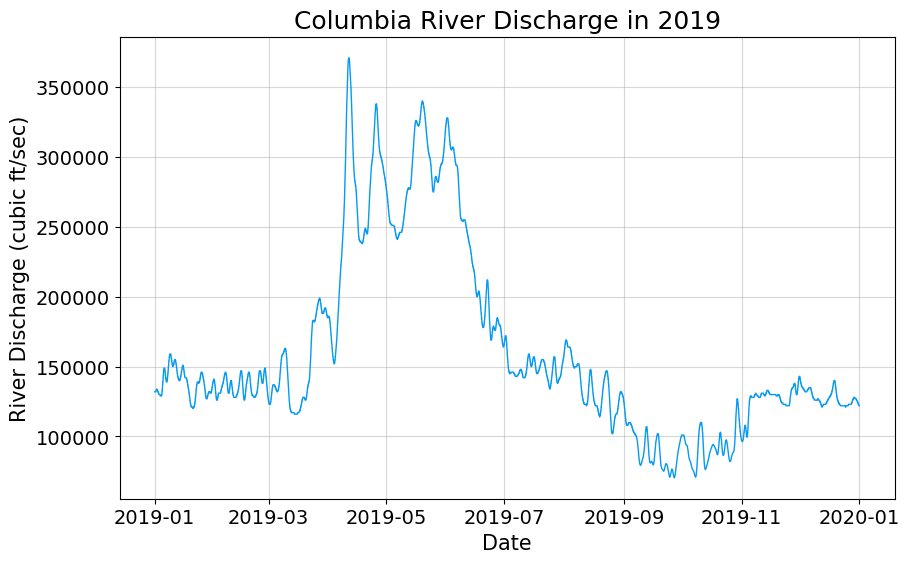

In [8]:
#RIVER DISCHARGE DATA
header_dis_2019 = 27
discharge_2019_df = pd.read_csv("2019_discharge.txt", sep = "\t", header = 0, skiprows = header_dis_2019) #converting to pandas dataframe so I can make datetime objects
discharge_2019_df["new_datetime"] = discharge_2019_df["datetime"].astype(str) + " " + discharge_2019_df["tz_cd"].astype(str) #adding datetime column
discharge_2019_df["new_datetime"] = pd.to_datetime(discharge_2019_df["new_datetime"]) #formatting to be datetime
datetime_dis_2019 = discharge_2019_df["new_datetime"].values #making datetime 1D array for plotting
discharge_2019 = discharge_2019_df["227828_72137_cd"].values #making discharge 1D array for plotting
display(discharge_2019_df)

fig, ax = plt.subplots(figsize = (10,6)) #inserting blank plot
ax.plot(datetime_dis_2019, discharge_2019, color = "#069AF3", linewidth = 1) #plotting river discharge levels over time
ax.set_title("Columbia River Discharge in 2019", fontsize = 18) #adding title
ax.set_xlabel("Date", fontsize = 15) #adding x-axis label
ax.set_ylabel("River Discharge (cubic ft/sec)", fontsize = 15) #adding y-axis label
ax.grid(alpha = 0.5) #adding gridlines
plt.rcParams.update({"font.size":13}) #increasing the fontsize to make the graph more easily readable

**Figure 4:** River discharge level of the Columbia River in 2019. This plot shows a peak in river discharge around 2019-05 and a trough around 2018-10, which will be compared to turbidity values to see if similar peaks and/or troughs occur and if there is a relationship.

<h2>5. Plotting of turbidity data from 2019-01-01 to 2019-12-31</h2>

This section includes the importing, formatting, and plotting of turbidity data from January 1st to December 31st, 2019. This graph will aid initial visual interpretation of long term turbidity patterns in this timeframe.

,agency_cd,site_no,datetime,tz_cd,116835_63680,116835_63680_cd,Unnamed: 6,new_datetime
0,USGS,14144700,1/1/2019,0:00,PST,4.1,A,2019-01-01 00:00:00
1,USGS,14144700,1/1/2019,0:05,PST,4.3,A,2019-01-01 00:05:00
2,USGS,14144700,1/1/2019,0:10,PST,4.0,A,2019-01-01 00:10:00
3,USGS,14144700,1/1/2019,0:15,PST,4.1,A,2019-01-01 00:15:00
4,USGS,14144700,1/1/2019,0:20,PST,4.0,A,2019-01-01 00:20:00
...,...,...,...,...,...,...,...,...
104697,USGS,14144700,12/31/2019,23:35,PST,1.7,A,2019-12-31 23:35:00
104698,USGS,14144700,12/31/2019,23:40,PST,1.8,A,2019-12-31 23:40:00
104699,USGS,14144700,12/31/2019,23:45,PST,1.8,A,2019-12-31 23:45:00
104700,USGS,14144700,12/31/2019,23:50,PST,1.8,A,2019-12-31 23:50:00


,116835_63680_cd
new_datetime,
2019-01-01 00:00:00,4.1
2019-01-01 00:05:00,4.3
2019-01-01 00:10:00,4.0
2019-01-01 00:15:00,4.1
2019-01-01 00:20:00,4.0
...,...
2019-12-31 23:35:00,1.7
2019-12-31 23:40:00,1.8
2019-12-31 23:45:00,1.8


,116835_63680_cd
new_datetime,
2019-01-01 00:00:00,4.158333
2019-01-01 01:00:00,3.991667
2019-01-01 02:00:00,3.858333
2019-01-01 03:00:00,3.816667
2019-01-01 04:00:00,3.708333
...,...
2019-12-31 19:00:00,1.850000
2019-12-31 20:00:00,1.841667
2019-12-31 21:00:00,1.791667


/tmp/ipykernel_99/803040617.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  turb_new_2019["turb_trend"] = turb_new_2019["116835_63680_cd"].rolling(window = 400, min_periods = 1).mean() #making trendline for turbidity


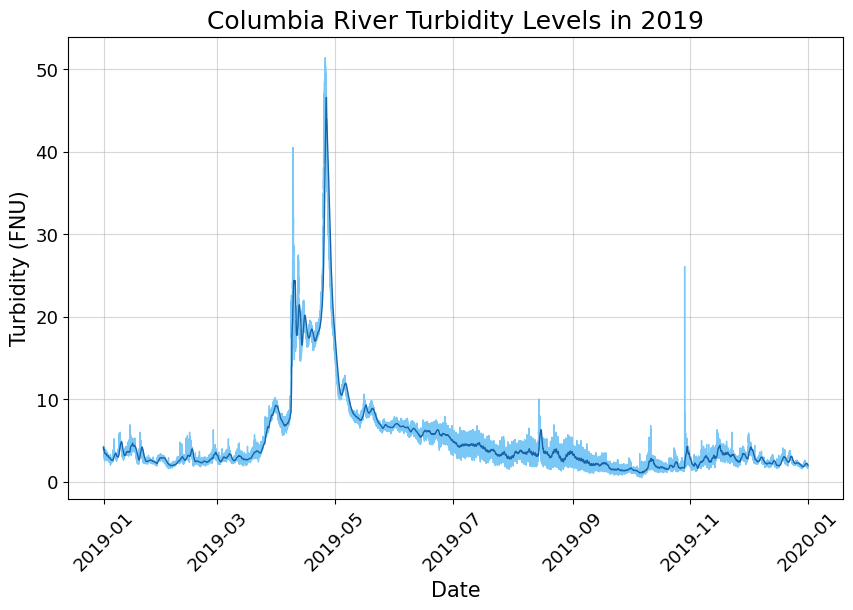

In [9]:
#TURBIDITY DATA
header_turb_2019 = 26
turbidity_2019_df = pd.read_csv("2019_turbidity.txt", sep = "\t", header = 0, skiprows = header_turb_2019) #converting to pandas dataframe so I can make datetime objects
turbidity_2019_df["new_datetime"] = turbidity_2019_df["datetime"].astype(str) + " " + turbidity_2019_df["tz_cd"].astype(str) #adding datetime column
turbidity_2019_df["new_datetime"] = pd.to_datetime(turbidity_2019_df["new_datetime"]) #formatting to be datetime
datetime_turb_2019 = turbidity_2019_df["new_datetime"].values #making datetime 1D array for plotting
discharge_2019 = turbidity_2019_df["116835_63680_cd"].values #making discharge 1D array for plotting
display(turbidity_2019_df)

#resampling data to be hourly so it matches the other dataset
turb_new_2019 = turbidity_2019_df[["new_datetime", "116835_63680_cd"]] #making a new data frame with only datetime and turbidity
turb_new_2019.set_index("new_datetime", inplace = True) #setting datetime to be the index
display(turb_new_2019)
turb_hourly_2019 = turb_new_2019.resample("H").mean()
display(turb_hourly_2019)

#plotting
fig, ax = plt.subplots(figsize = (10,6)) #inserting blank plot
ax.plot(turb_new_2019.index, turb_new_2019["116835_63680_cd"], color = "#7BC8F6", linewidth = 1) #plotting salinity over time
turb_new_2019["turb_trend"] = turb_new_2019["116835_63680_cd"].rolling(window = 400, min_periods = 1).mean() #making trendline for turbidity
ax.plot(turb_new_2019.index, turb_new_2019["turb_trend"], color = "#1864AB", linewidth = 1, label = "Turbidity Moving Average")
ax.grid(alpha = 0.5) #adding gridlines
plt.rcParams.update({"font.size":12}) #increasing the fontsize to make the graph more easily readable
plt.xticks(rotation=45) #rotating x-axis labels to make them more readable
ax.set_title("Columbia River Turbidity Levels in 2019", fontsize = 18) #setting title
ax.set_xlabel("Date", fontsize = 15) #setting x-axis label
ax.set_ylabel("Turbidity (FNU)", fontsize = 15) #setting y-axis label
plt.rcParams.update({"font.size":12}) #increasing the fontsize to make the graph more easily readable

**Figure 5:** Turbidity levels in the Columbia River in 2019, including a moving average line (darker blue). This plot shows a peak in river discharge around 2019-05, which will be compared to turbidity values to see if similar peaks and/or troughs occur and if there is a relationship.

<h2>6. Regression between river discharge and turbidity data from 2019-01-01 to 2019-12-31</h2>

This section includes the interpolating of turbidity data to ensure there are an equal number of data points in both the turbidity and river discharge data sets, as well as regression analysis between the two variables to check for correlation and plotting of the regression. This will quantify the relationship between river discharge and turbidity under this timeframe.

In [10]:
#checking if there are NaN values I need to interpolate
print(turb_hourly_2019["116835_63680_cd"].isna().sum()) #seeing if there are any NaN values
print(discharge_2019_df["227828_72137_cd"].isna().sum()) #seeing if there are any NaN values

19
0


In [11]:
#finding the indices where I need to interpolate
nan_indices_2019 = np.where(turb_hourly_2019.isna()) #finding NaN indices
print(nan_indices_2019) #printing them so I can see where they are

(array([ 732,  733,  734,  735, 1634, 3951, 3952, 3953, 3954, 3955, 3956,
       3957, 3958, 3959, 3960, 3961, 3962, 3963, 3964]), array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]))


In [12]:
#interpolating over gaps
turb_hourly_2019["116835_63680_cd"] = turb_hourly_2019["116835_63680_cd"].interpolate(method = "linear") #interpolating
print(turb_hourly_2019["116835_63680_cd"].isna().sum()) #seeing if there are any NaN values

0


There is an 69.75881664236411 % correlation


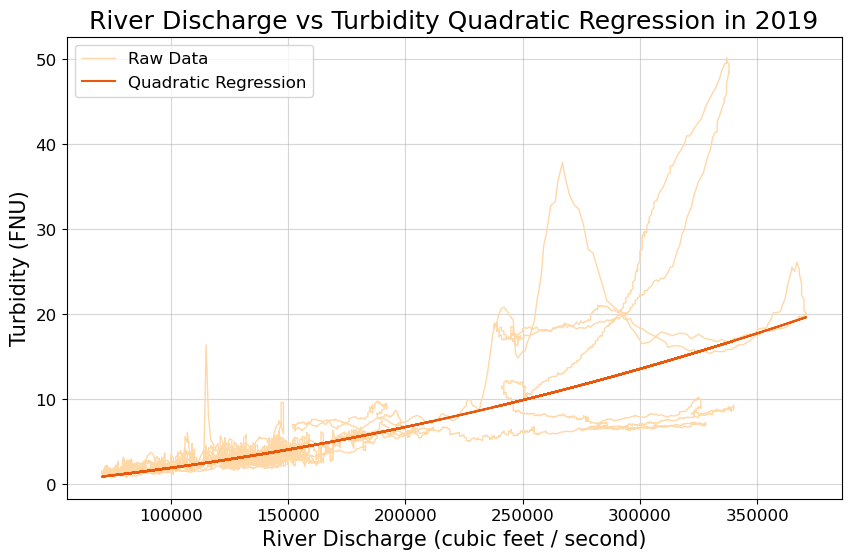

In [13]:
#using np.polyfit to get quadratic regression, plotting graph with quadratic regression line
coefficients_2019 = np.polyfit(discharge_2019_df["227828_72137_cd"], turb_hourly_2019["116835_63680_cd"], 2) #fitting quadratic regression
a_2019, b_2019, c_2019 = coefficients_2019 #extracting coefficients for equation
quad_reg_2019 = a_2019*discharge_2019_df["227828_72137_cd"]**2 + b_2019*discharge_2019_df["227828_72137_cd"] + c_2019 #formatting quadratic regression equation
fig, ax = plt.subplots(figsize=(10,6)) #inserting blank plot
ax.plot(discharge_2019_df["227828_72137_cd"], turb_hourly_2019["116835_63680_cd"], color="#FFD8A8", linewidth=1, label="Raw Data") #plotting raw data
ax.plot(discharge_2019_df["227828_72137_cd"], quad_reg_2019, label="Quadratic Regression", color="#E8590C") #plotting quadratic regression line
ax.legend(fontsize=12) # adding legend
ax.set_title("River Discharge vs Turbidity Quadratic Regression in 2019", fontsize=18) #setting title
ax.set_xlabel("River Discharge (cubic feet / second)", fontsize=15) #seeting x-axis label
ax.set_ylabel("Turbidity (FNU)", fontsize=15) #setting y-axis label
plt.rcParams.update({"font.size":14}) #adjusting font size
ax.grid(alpha = 0.5)

#performing a quadratic regression!
coefficients_2019 = np.polyfit(turb_hourly_2019["116835_63680_cd"], discharge_2019_df["227828_72137_cd"], 2) #finding a, b, and c coefficients for quadratic regression
quadratic_fit_2019 = np.poly1d(coefficients_2019) #creating quadratic function
predicted_values_2019 = quadratic_fit_2019(turb_hourly_2019["116835_63680_cd"]) #find predicted values based on quadratic function

#calculate r-squared for the quadratic regression
ss_total_2019 = np.sum((discharge_2019_df["227828_72137_cd"] - np.mean(discharge_2019_df["227828_72137_cd"])) ** 2) #sum of squares (measures total variance in data)
ss_residual_2019 = np.sum((discharge_2019_df["227828_72137_cd"] - predicted_values_2019) ** 2) #residual sum of squares, measures variance between observed and predicted values
r_squared_2019 = 1 - (ss_residual_2019 / ss_total_2019) #calculating r-squared from those values
print("There is an", r_squared_2019*100, "% correlation")

**Figure 6:** Regression between turbidity and river discharge levels in the Columbia River in 2019, with a quadratic line of best fit (darker orange). R-squared correlation value is 0.6976, showing that there is a significant correlation between river discharge and turbidity in this timeframe. Again note the distribution of data points towards the lower end of the graph and the high number of outliers on the higher side.

<h2>7. Plotting of river discharge data from 2022-10-01 to 2022-10-01</h2>

This section includes the importing, formatting, and plotting of river discharge data from October 1st, 2022 to October 1st, 2023. This graph will aid initial visual interpretation of long term river discharge patterns in this timeframe.

,agency_cd,site_no,datetime,tz_cd,227828_72137,227828_72137_cd,Unnamed: 6,new_datetime
0,USGS,14144700,9/30/2022,23:00,PDT,111000,A,2022-09-30 23:00:00
1,USGS,14144700,10/1/2022,0:00,PDT,111000,A,2022-10-01 00:00:00
2,USGS,14144700,10/1/2022,1:00,PDT,110000,A,2022-10-01 01:00:00
3,USGS,14144700,10/1/2022,2:00,PDT,110000,A,2022-10-01 02:00:00
4,USGS,14144700,10/1/2022,3:00,PDT,110000,A,2022-10-01 03:00:00
...,...,...,...,...,...,...,...,...
8779,USGS,14144700,10/1/2023,18:00,PDT,92200,A,2023-10-01 18:00:00
8780,USGS,14144700,10/1/2023,19:00,PDT,92100,A,2023-10-01 19:00:00
8781,USGS,14144700,10/1/2023,20:00,PDT,92000,A,2023-10-01 20:00:00
8782,USGS,14144700,10/1/2023,21:00,PDT,91800,A,2023-10-01 21:00:00


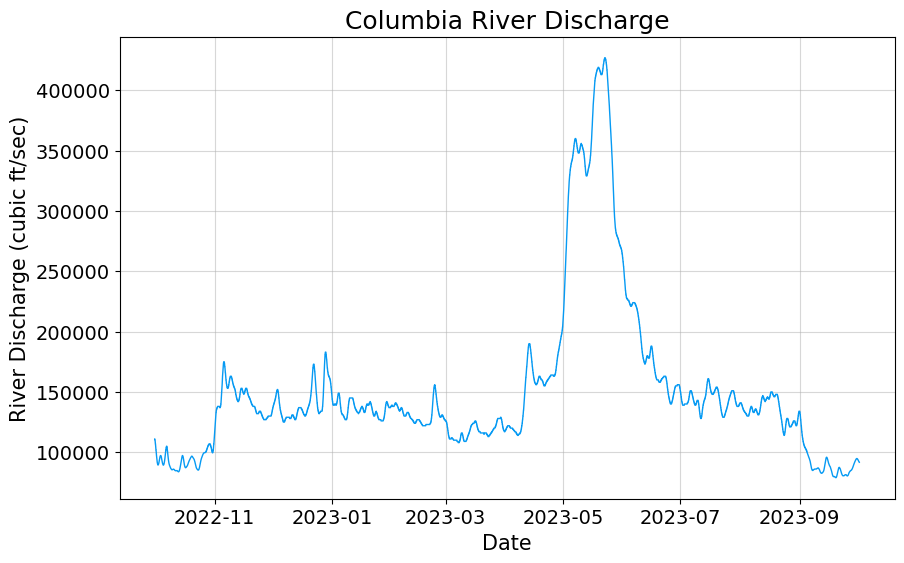

In [14]:
#RIVER DISCHARGE DATA
discharge_22_23_df = pd.read_csv("10.22_to_10.23_discharge.txt", sep = "\t", header = 0, skiprows = 27) #converting to pandas dataframe so I can make datetime objects
discharge_22_23_df["new_datetime"] = discharge_22_23_df["datetime"].astype(str) + " " + discharge_22_23_df["tz_cd"].astype(str) #adding datetime column
discharge_22_23_df["new_datetime"] = pd.to_datetime(discharge_22_23_df["new_datetime"]) #formatting to be datetime
datetime_dis_22_23 = discharge_22_23_df["new_datetime"].values #making datetime 1D array for plotting
discharge_22_23 = discharge_22_23_df["227828_72137_cd"].values #making discharge 1D array for plotting
display(discharge_22_23_df)

fig, ax = plt.subplots(figsize = (10,6)) #inserting blank plot
ax.plot(datetime_dis_22_23, discharge_22_23, color = "#069AF3", linewidth = 1) #plotting river discharge levels over time
ax.set_title("Columbia River Discharge", fontsize = 18) #adding title
ax.set_xlabel("Date", fontsize = 15) #adding x-axis label
ax.set_ylabel("River Discharge (cubic ft/sec)", fontsize = 15) #adding y-axis label
ax.grid(alpha = 0.5) #adding gridlines
plt.rcParams.update({"font.size":13}) #increasing the fontsize to make the graph more easily readable

**Figure 7:** River discharge level in the Columbia River between 2022-10-01 and 2023-10-01. This plot shows a peak in river discharge around 2023-06, which will be compared to turbidity values to see if similar peaks and/or troughs occur and if there is a relationship.

<h2>8. Plotting of turbidity data from 2022-10-01 to 2023-10-01</h2>

This section includes the importing, formatting, and plotting of turbidity data from October 1st, 2022 to October 1st, 2023. This graph will aid initial visual interpretation of long term turbidity patterns in this timeframe.

,260097_99409_cd
new_datetime,
2022-09-30 23:00:00,3.741667
2022-10-01 00:00:00,4.241667
2022-10-01 01:00:00,4.433333
2022-10-01 02:00:00,4.491667
2022-10-01 03:00:00,4.375000
...,...
2023-10-01 18:00:00,1.558333
2023-10-01 19:00:00,1.600000
2023-10-01 20:00:00,1.800000


/tmp/ipykernel_99/2692440830.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  turb_new_22_23["turb_trend"] = turb_new_22_23["260097_99409_cd"].rolling(window = 400, min_periods = 1).mean() #making trendline for turbidity


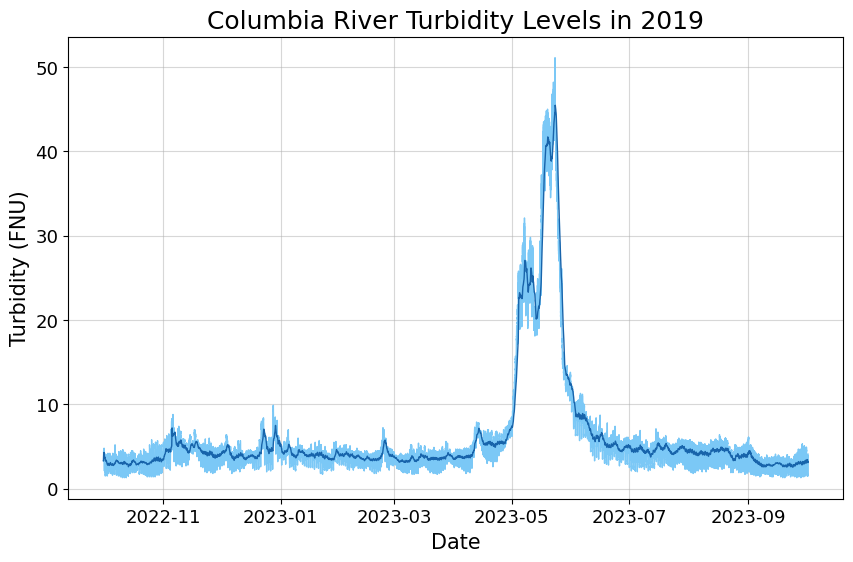

In [15]:
#TURBIDITY DATA
turbidity_22_23_df = pd.read_csv("10.22_to_10.23_turbidity.txt", sep = "\t", header = 0, skiprows = 28) #converting to pandas dataframe so I can make datetime objects
turbidity_22_23_df["new_datetime"] = turbidity_22_23_df["datetime"].astype(str) + " " + turbidity_22_23_df["tz_cd"].astype(str) #adding datetime column
turbidity_22_23_df["new_datetime"] = pd.to_datetime(turbidity_22_23_df["new_datetime"]) #formatting to be datetime
datetime_turb_22_23 = turbidity_22_23_df["new_datetime"].values #making datetime 1D array for plotting
discharge_22_23 = turbidity_22_23_df["260097_99409_cd"].values #making discharge 1D array for plotting

#resampling data to be hourly so it matches the other dataset
turb_new_22_23 = turbidity_22_23_df[["new_datetime", "260097_99409_cd"]] #making a new data frame with only datetime and turbidity
turb_new_22_23.set_index("new_datetime", inplace = True) #setting datetime to be the index
turb_hourly_22_23 = turb_new_22_23.resample("H").mean()
display(turb_hourly_22_23)

#plotting
fig, ax = plt.subplots(figsize = (10,6)) #inserting blank plot
ax.plot(turb_new_22_23.index, turb_new_22_23["260097_99409_cd"], color = "#7BC8F6", linewidth = 1) #plotting salinity over time
turb_new_22_23["turb_trend"] = turb_new_22_23["260097_99409_cd"].rolling(window = 400, min_periods = 1).mean() #making trendline for turbidity
ax.plot(turb_new_22_23.index, turb_new_22_23["turb_trend"], color = "#1864AB", linewidth = 1, label = "Turbidity Moving Average")
ax.grid(alpha = 0.5) #adding gridlines
plt.rcParams.update({"font.size":12}) #increasing the fontsize to make the graph more easily readable
ax.set_title("Columbia River Turbidity Levels in 2019", fontsize = 18) #setting title
ax.set_xlabel("Date", fontsize = 15) #setting x-axis label
ax.set_ylabel("Turbidity (FNU)", fontsize = 15) #setting y-axis label
plt.rcParams.update({"font.size":12}) #increasing the fontsize to make the graph more easily readable

**Figure 8:** Turbidity levels in the Columbia River between 2022-10-01 and 2023-10-01, including a moving average line (darker blue). This plot shows a peak in river discharge around 2023-06, which will be compared to turbidity values to see if similar peaks and/or troughs occur and if there is a relationship.

<h2>9. Regression between river discharge and turbidity data from 2022-10-01 to 2023-10-01</h2>

This section includes the interpolating of turbidity data to ensure there are an equal number of data points in both the turbidity and river discharge data sets, as well as regression analysis between the two variables to check for correlation and plotting of the regression. This will quantify the relationship between river discharge and turbidity under this timeframe.

In [16]:
#checking if there are NaN values I need to interpolate
print(turb_hourly_22_23["260097_99409_cd"].isna().sum()) #seeing if there are any NaN values
print(discharge_22_23_df["227828_72137_cd"].isna().sum()) #seeing if there are any NaN values

1
0


In [17]:
#finding the indices where I need to interpolate
nan_indices_22_23 = np.where(turb_hourly_22_23.isna()) #finding NaN indices
print(nan_indices_22_23) #printing them so I can see where they are

(array([3891]), array([0]))


In [18]:
#interpolating over gaps
turb_hourly_22_23["260097_99409_cd"] = turb_hourly_22_23["260097_99409_cd"].interpolate(method = "linear") #interpolating
print(turb_hourly_22_23["260097_99409_cd"].isna().sum()) #seeing if there are any NaN values

0


0.9291497335633216


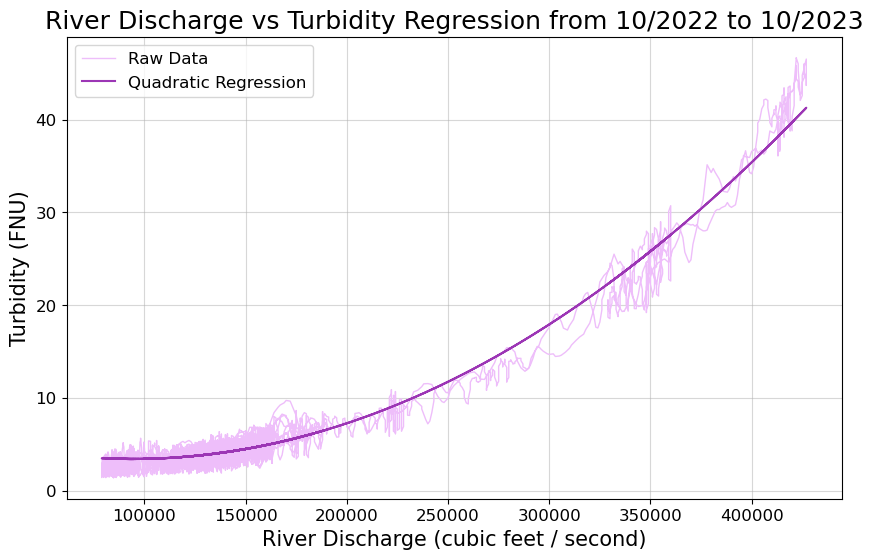

In [19]:
#using np.polyfit to get quadratic regression, plotting graph with quadratic regression line
turb_hourly_clean_22_23 = turb_hourly_22_23.dropna(subset=["260097_99409_cd"]) #dropping the NaN value
discharge_new_22_23 = discharge_22_23_df.iloc[0:8784] #dropping the last value off this dataset for now so I can do a linear regression (so each dataset has the same number of values)
coefficients_22_23 = np.polyfit(discharge_new_22_23["227828_72137_cd"], turb_hourly_clean_22_23["260097_99409_cd"], 2) #fitting quadratic regression
a_22_23, b_22_23, c_22_23 = coefficients_22_23 #extracting coefficients for equation
quad_reg_22_23 = a_22_23*discharge_new_22_23["227828_72137_cd"]**2 + b_22_23*discharge_new_22_23["227828_72137_cd"] + c_22_23 #formatting quadratic regression equation
fig, ax = plt.subplots(figsize=(10,6)) #inserting blank plot
ax.plot(discharge_new_22_23["227828_72137_cd"], turb_hourly_clean_22_23["260097_99409_cd"], color="#EEBEFA", linewidth=1, label="Raw Data") #plotting raw data
ax.plot(discharge_new_22_23["227828_72137_cd"], quad_reg_22_23, label="Quadratic Regression", color="#9C36B5") #plotting quadratic regression line
ax.legend(fontsize=12) # adding legend
ax.set_title("River Discharge vs Turbidity Regression from 10/2022 to 10/2023", fontsize=18) #setting title
ax.set_xlabel("River Discharge (cubic feet / second)", fontsize=15) #seeting x-axis label
ax.set_ylabel("Turbidity (FNU)", fontsize=15) #setting y-axis label
plt.rcParams.update({"font.size":14}) #adjusting font size
ax.grid(alpha = 0.5) #adding legend

#performing a quadratic regression!
coefficients_22_23 = np.polyfit(turb_hourly_clean_22_23["260097_99409_cd"], discharge_new_22_23["227828_72137_cd"], 2) #finding a, b, and c coefficients for quadratic regression
quadratic_fit_22_23 = np.poly1d(coefficients_22_23) #creating quadratic function
predicted_values_22_23 = quadratic_fit_22_23(turb_hourly_clean_22_23["260097_99409_cd"]) #find predicted values based on quadratic function

#calculate r-squared for the quadratic regression
ss_total_22_23 = np.sum((discharge_new_22_23["227828_72137_cd"] - np.mean(discharge_new_22_23["227828_72137_cd"])) ** 2) #sum of squares (measures total variance in data)
ss_residual_22_23 = np.sum((discharge_new_22_23["227828_72137_cd"] - predicted_values_22_23) ** 2) #residual sum of squares, measures variance between observed and predicted values
r_squared_22_23 = 1 - (ss_residual_22_23 / ss_total_22_23) #calculating r-squared from those values
print(r_squared_22_23)

**Figure 9:** Regression between turbidity and river discharge levels in the Columbia River between 2022-10-01 and 2023-10-01, with a quadratic line of best fit (darker pink). R-squared correlation value is 0.9291, showing that there is a significant correlation between river discharge and turbidity in this timeframe. Note again the distribution of data points favoring the lower side of this graph. Also note that there are significantly fewer outliers in this dataset, reflected in the significantly higher r-squared value.

<h2>Discussion</h2>

**Discussion of Results**

Regression analysis between long term river discharge and turbidity data in the Columbia River in 2018, 2019, 2022, and 2023 showed that there is a strong positive quadratic correlation between discharge and turbidity with a relatively high degree of annual variation. Over three year-long sample periods, correlation values of 81%, 70%, and 93% (in 2018, 2019, and 2022-2023, respectively) were obtained. This means that to a high degree, river discharge is an influential factor in determining the turbidity level in the Columbia River. It is also significant that the correlation was quadratic instead of linear. This is likely due to the range of normal discharge level compared to flood stage discharge. When the river is within a normal range, there will not be a significant change to turbidity. However when the river advances to flood stage, there will be an exponential increase in turbidity due to the fact that the river level is advancing higher up and collecting more material. There were several outliers in each data set, suggesting that other factors (rainfall versus snowmelt as a water source, upstream conditions including weather, construction, geographic conditions, and more) are also having significant impacts on turbidity levels.

**Limitations and Future Work**

Because of the nature of data collection at this station (bank surface mounted flow meter and nephelometer), data may not be at all times perfectly representative of conditions throughout the rest of the river. Additionally, this research only includes analysis of data from one geographic location, not considering whether this pattern is reflected in other rivers. Additionally, several small gaps existed in raw data that had to be interpolated over, introducing potential inaccuracy in data points used for regression analysis. In future research it would be helpful to have more reliable data collection with fewer gaps, and to have more widespread data collection in other rivers as to see if this pattern exists in other geographic locations. 

<h2>References</h2>

- U.S. Geological Survey. 2016-03-03 - present. *Columbia River at Vancouver, WA - 14144700*, accessed 2024-11-22. 
https://waterdata.usgs.gov/monitoring-location/14144700/#dataTypeId=continuous-72137-0&period=P7D&showMedian=false
- U.S. Geological Survey. 2016-04-16 - present. *Turbidity, water, unfiltered, formazin nephelometric units (FNU)*, access 2024-11-22. https://waterdata.usgs.gov/monitoring-location/14144700/#dataTypeId=continuous-63680-264921905&period=P7D&showMedian=false
- U.S. Geological Survey. *How/Why Does the USGS Collect Streamflow Data*, USGS. https://www.usgs.gov/centers/dakota-water-science-center/howwhy-does-usgs-collect-streamflow-data#:~:text=Discharge%20then%20is%20calculated%20by,the%20action%20of%20flowing%20water.
- Bizzi, S. (2022, Nov 3). *Disentangling River Water Flow and its Turbidity*, EOS. https://eos.org/editor-highlights/disentangling-river-water-turbidity-and-its-flow#:~:text=Source:%20Water%20Resources%20Research,United%20States%20and%20potentially%20worldwide.
- Göransson, G., Larson, M., Bendz, D. (2013, July 8). *Variation in turbidity with precipitation and flow in a regulated river system – river Göta Älv, SW Sweden*, European Geosciences Union. https://doi.org/10.5194/hess-17-2529-2013.
- *Turbidity*, Government of the Northwest Territories. https://www.gov.nt.ca/sites/ecc/files/turbidity.pdf
- Joint Release. (2012, Oct 23). *After dam removal, sediment muddies the water*, Advancing Earth and Space Sciences.https://news.agu.org/press-release/after-dam-removal-sediment-muddies-the-water/.